# 1: BUSINESS PROBLEM

Nell’s Lettings, a real estate agency, wants to know what kind of houses people like in California and how various house features influence the house price to chart out valuations of houses in California.

# 2: Uploading, exploring and cleaning data

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import LocalOutlierFactor
from matplotlib import cm

In [7]:
# ======Load the California Housing dataset======
dataset = ds.fetch_california_housing()
# put all the variables in one dataframe
data = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
data['house_price'] = dataset['target']


data.info()
print(type(data)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   house_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>


In [3]:
# ======Preprocessing(delete outliers)======
loc= LocalOutlierFactor(n_neighbors = 20, contamination = 0.2)
outliers_loc = loc.fit_predict(data)
data['outlier_lof'] = pd.DataFrame(outliers_loc)  
data.drop(data[data['outlier_lof'] == -1].index, inplace=True)   # delete all the outlier

## Task 1: Types of houses preferred by Californians

In [6]:
# ======Task 1: what kind of houses do most people like======
def draw_his(data, features, plot_size):
    """
    a function for drawing the histogram, and features can be changed according to needs 
    :param data: a dataframe
    :param features: a list
    :param plot_size: a list, it depends on the length of features
    :return: None
    """
    plt.figure(figsize=(10, 8), dpi=200)
    plt.suptitle('Distribution Of Houses In Different Blocks With Respect To House Features')
    # create each subgraph
    for no_feature in range(len(features)):
        plt.subplot(plot_size[0], plot_size[1], no_feature+1)
        plt.hist(x=data[features[no_feature]], bins='auto')
        plt.xlabel(features[no_feature])
        plt.ylabel('number of houses')
        plt.xlim(0, int(max(data[features[no_feature]])) + 1)
    plt.show()


### Figure 1: histogram

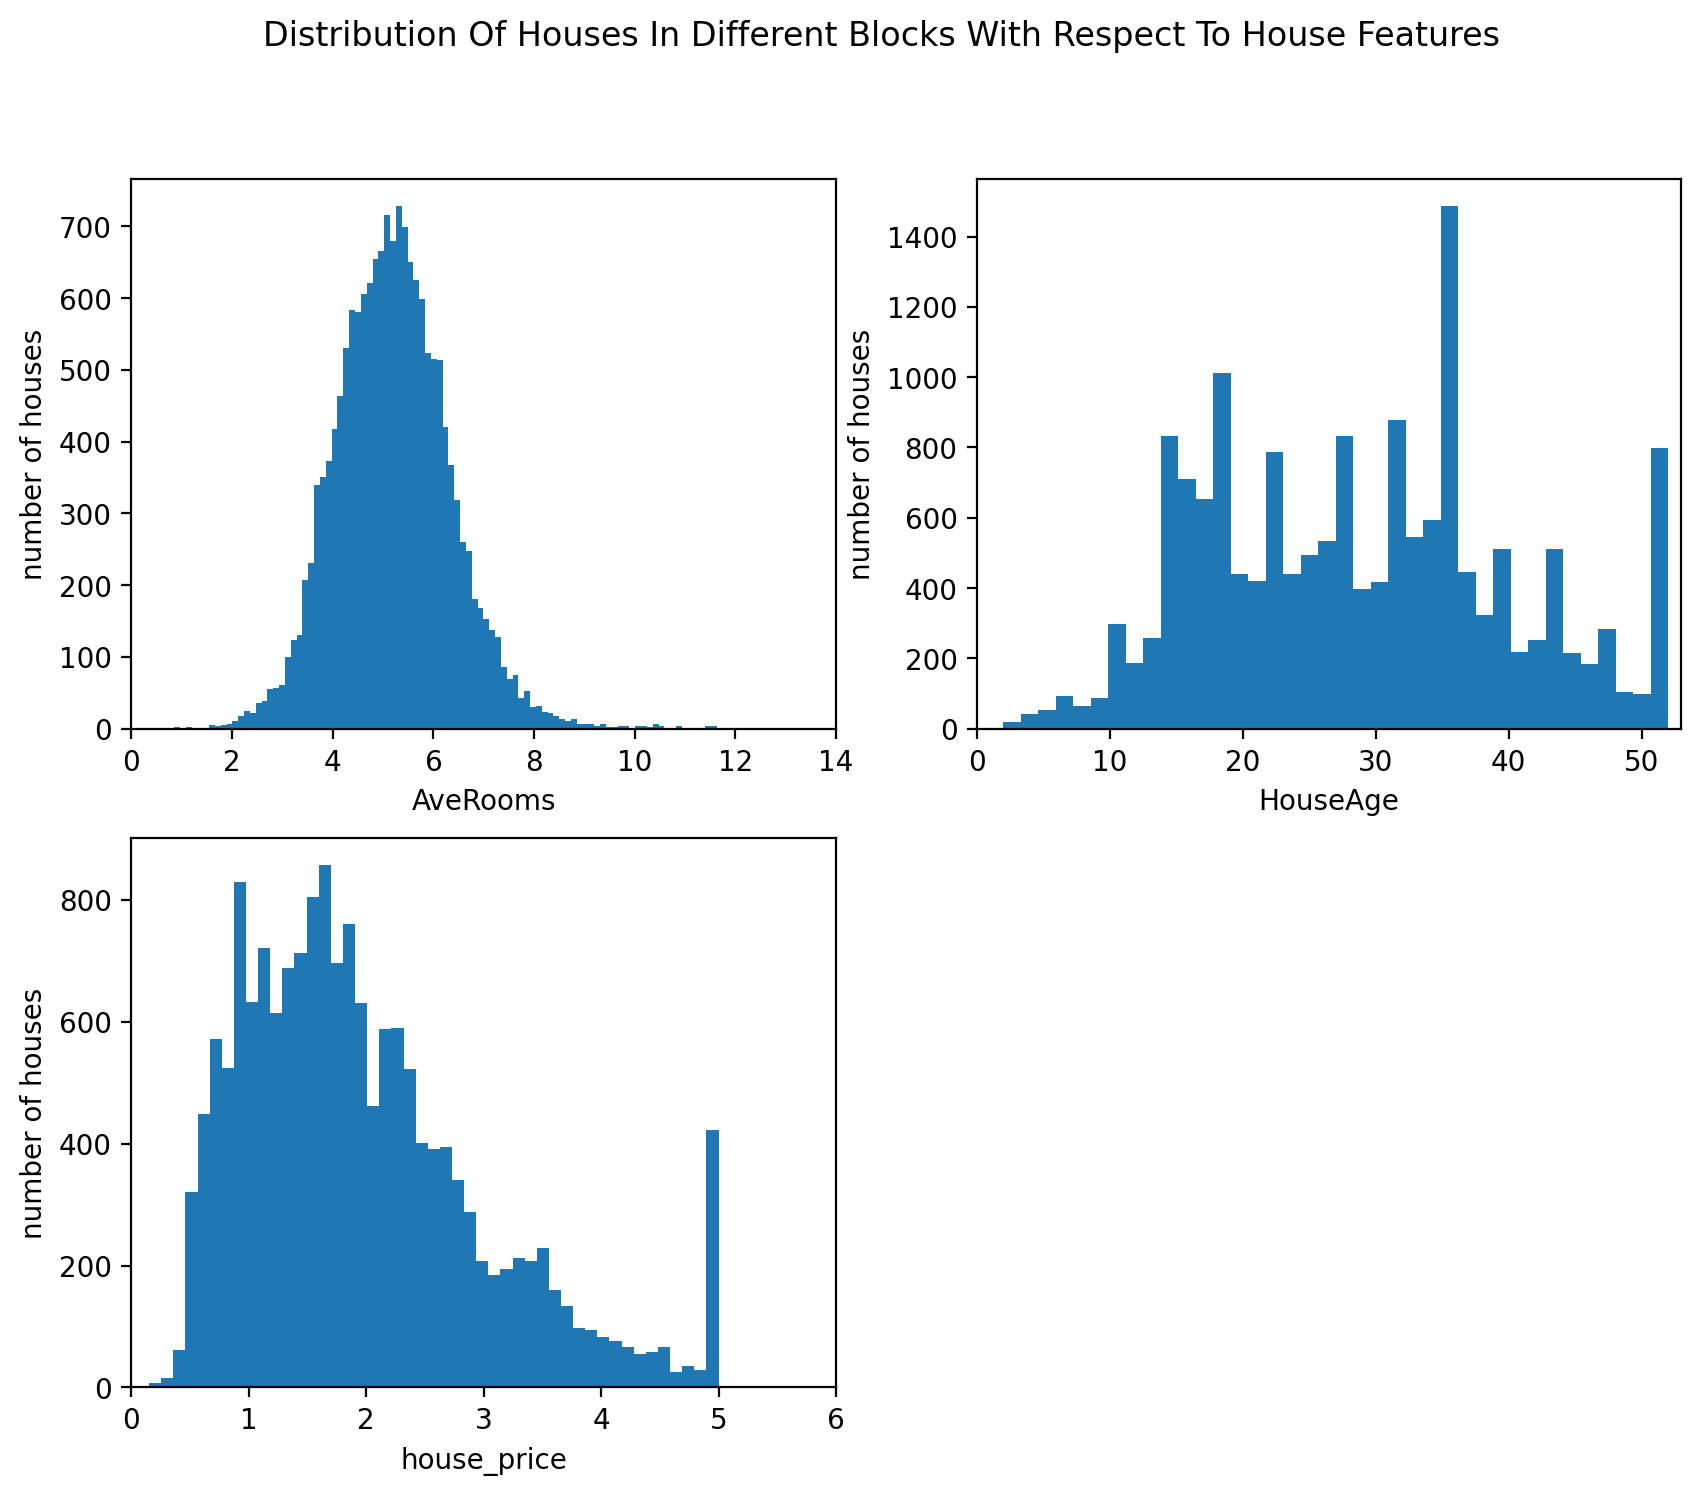

In [7]:
# ======Task 1: what kind of houses do most people like======
draw_his(data=data, features=['AveRooms', 'HouseAge', 'house_price'], plot_size=[2, 2])

## Task 2: House features influencing house prices

In [16]:
# ======Task 2: how features influence the house price======
def LR_heatmap(X, Y, title):
    """
    a function for LinearRegression and drawing a heatmap to show the regression coefficient
    :param X: the features in LinearRegression
    :param Y: the targets in LinearRegression
    :param title: the title for heatmap
    :return: the predicted values
    """
    # ------LinearRegression------
    clf = linear_model.LinearRegression()
    clf.fit(X, Y)
    y_pred = clf.predict(X)

    # ------draw a heatmap which can show the regression coefficient------
    X_features = X.columns.values.tolist()
    plt.figure(figsize=(10, 8), dpi=200)
    plt.xticks(np.arange(len(X_features)), labels=X_features, rotation=45, rotation_mode="anchor", ha="right")
    plt.yticks(np.arange(len(X_features)), labels=X_features)
    plt.title(title)
    regression_coefficient = np.diag(clf.coef_.round(5).squeeze())
    
    # add the value for each cell in the heatmap
    for i in range(len(X_features)):
        for j in range(len(X_features)):
            plt.text(j, i, regression_coefficient[i, j], ha="center", va="center", color="k")
    
    # set the color for the colorbar
    map_vir = cm.get_cmap('coolwarm')
    plt.imshow(regression_coefficient, cmap=map_vir)
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    return y_pred


### Figure 2: Heatmap

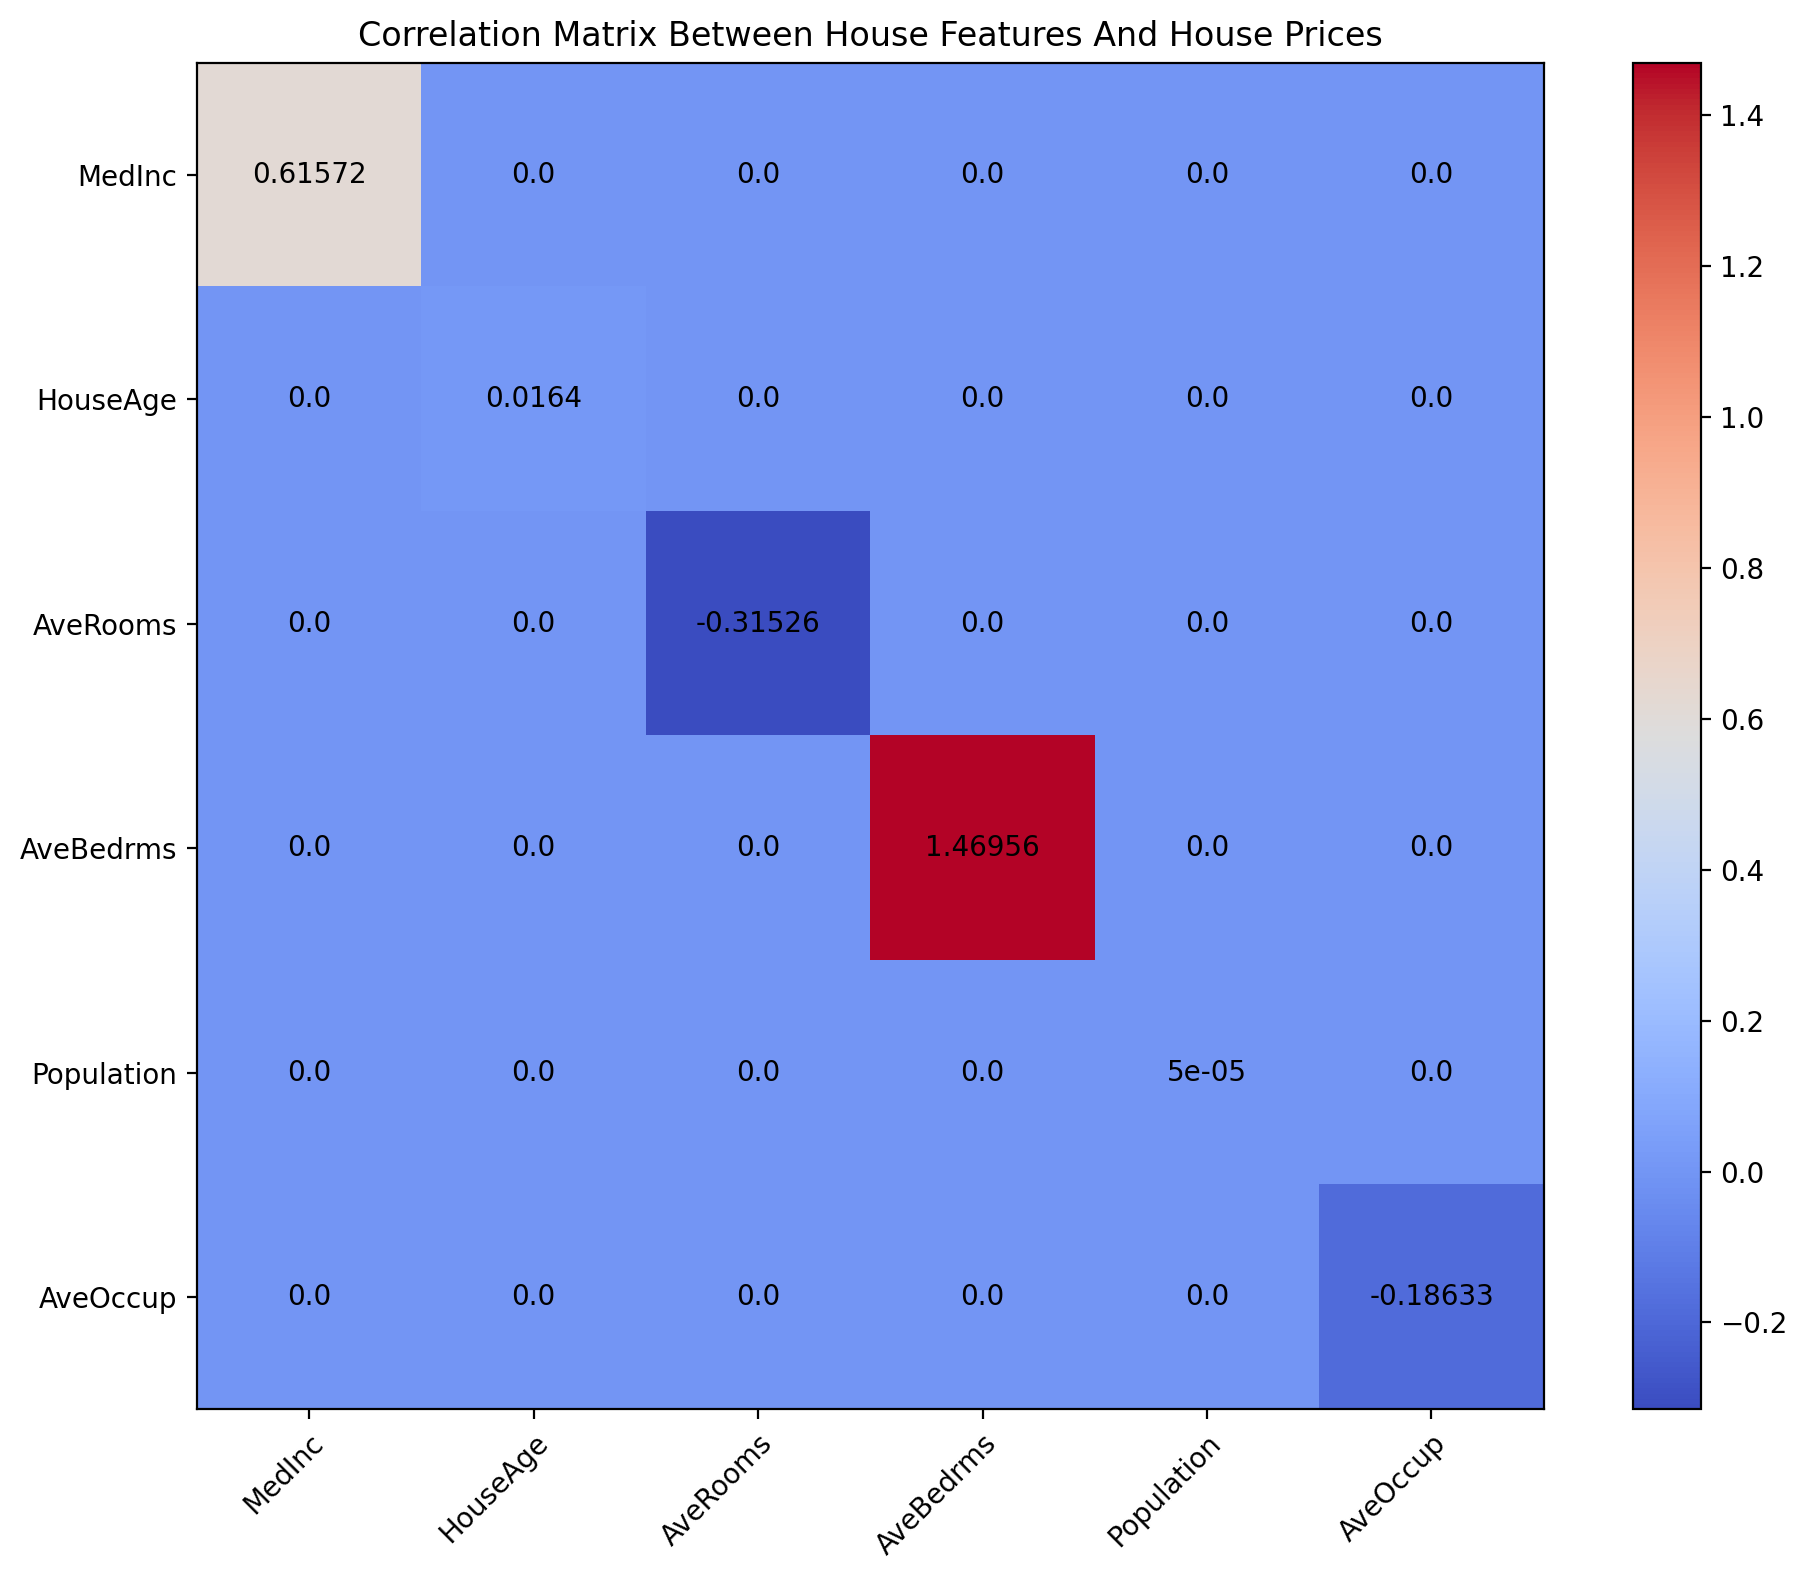

In [17]:
# ------LinearRegression and draw the heatmap------
# independent variable
X = data.loc[:, ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]
# dependent variable
Y = data.loc[:, ['house_price']]
y_pred = LR_heatmap(X=X, Y=Y,
                   title="Correlation Matrix Between House Features And House Prices")

In this heat map, the correlation between Medium_income and house prices is still the largest and positively correlated. In addition, the AveBedrms also has a positive correlation with house prices, AveRooms has a negative correlation with house prices, and the rest of the features have no obvious correlation with house prices. 

### Figure 3: scatter plot

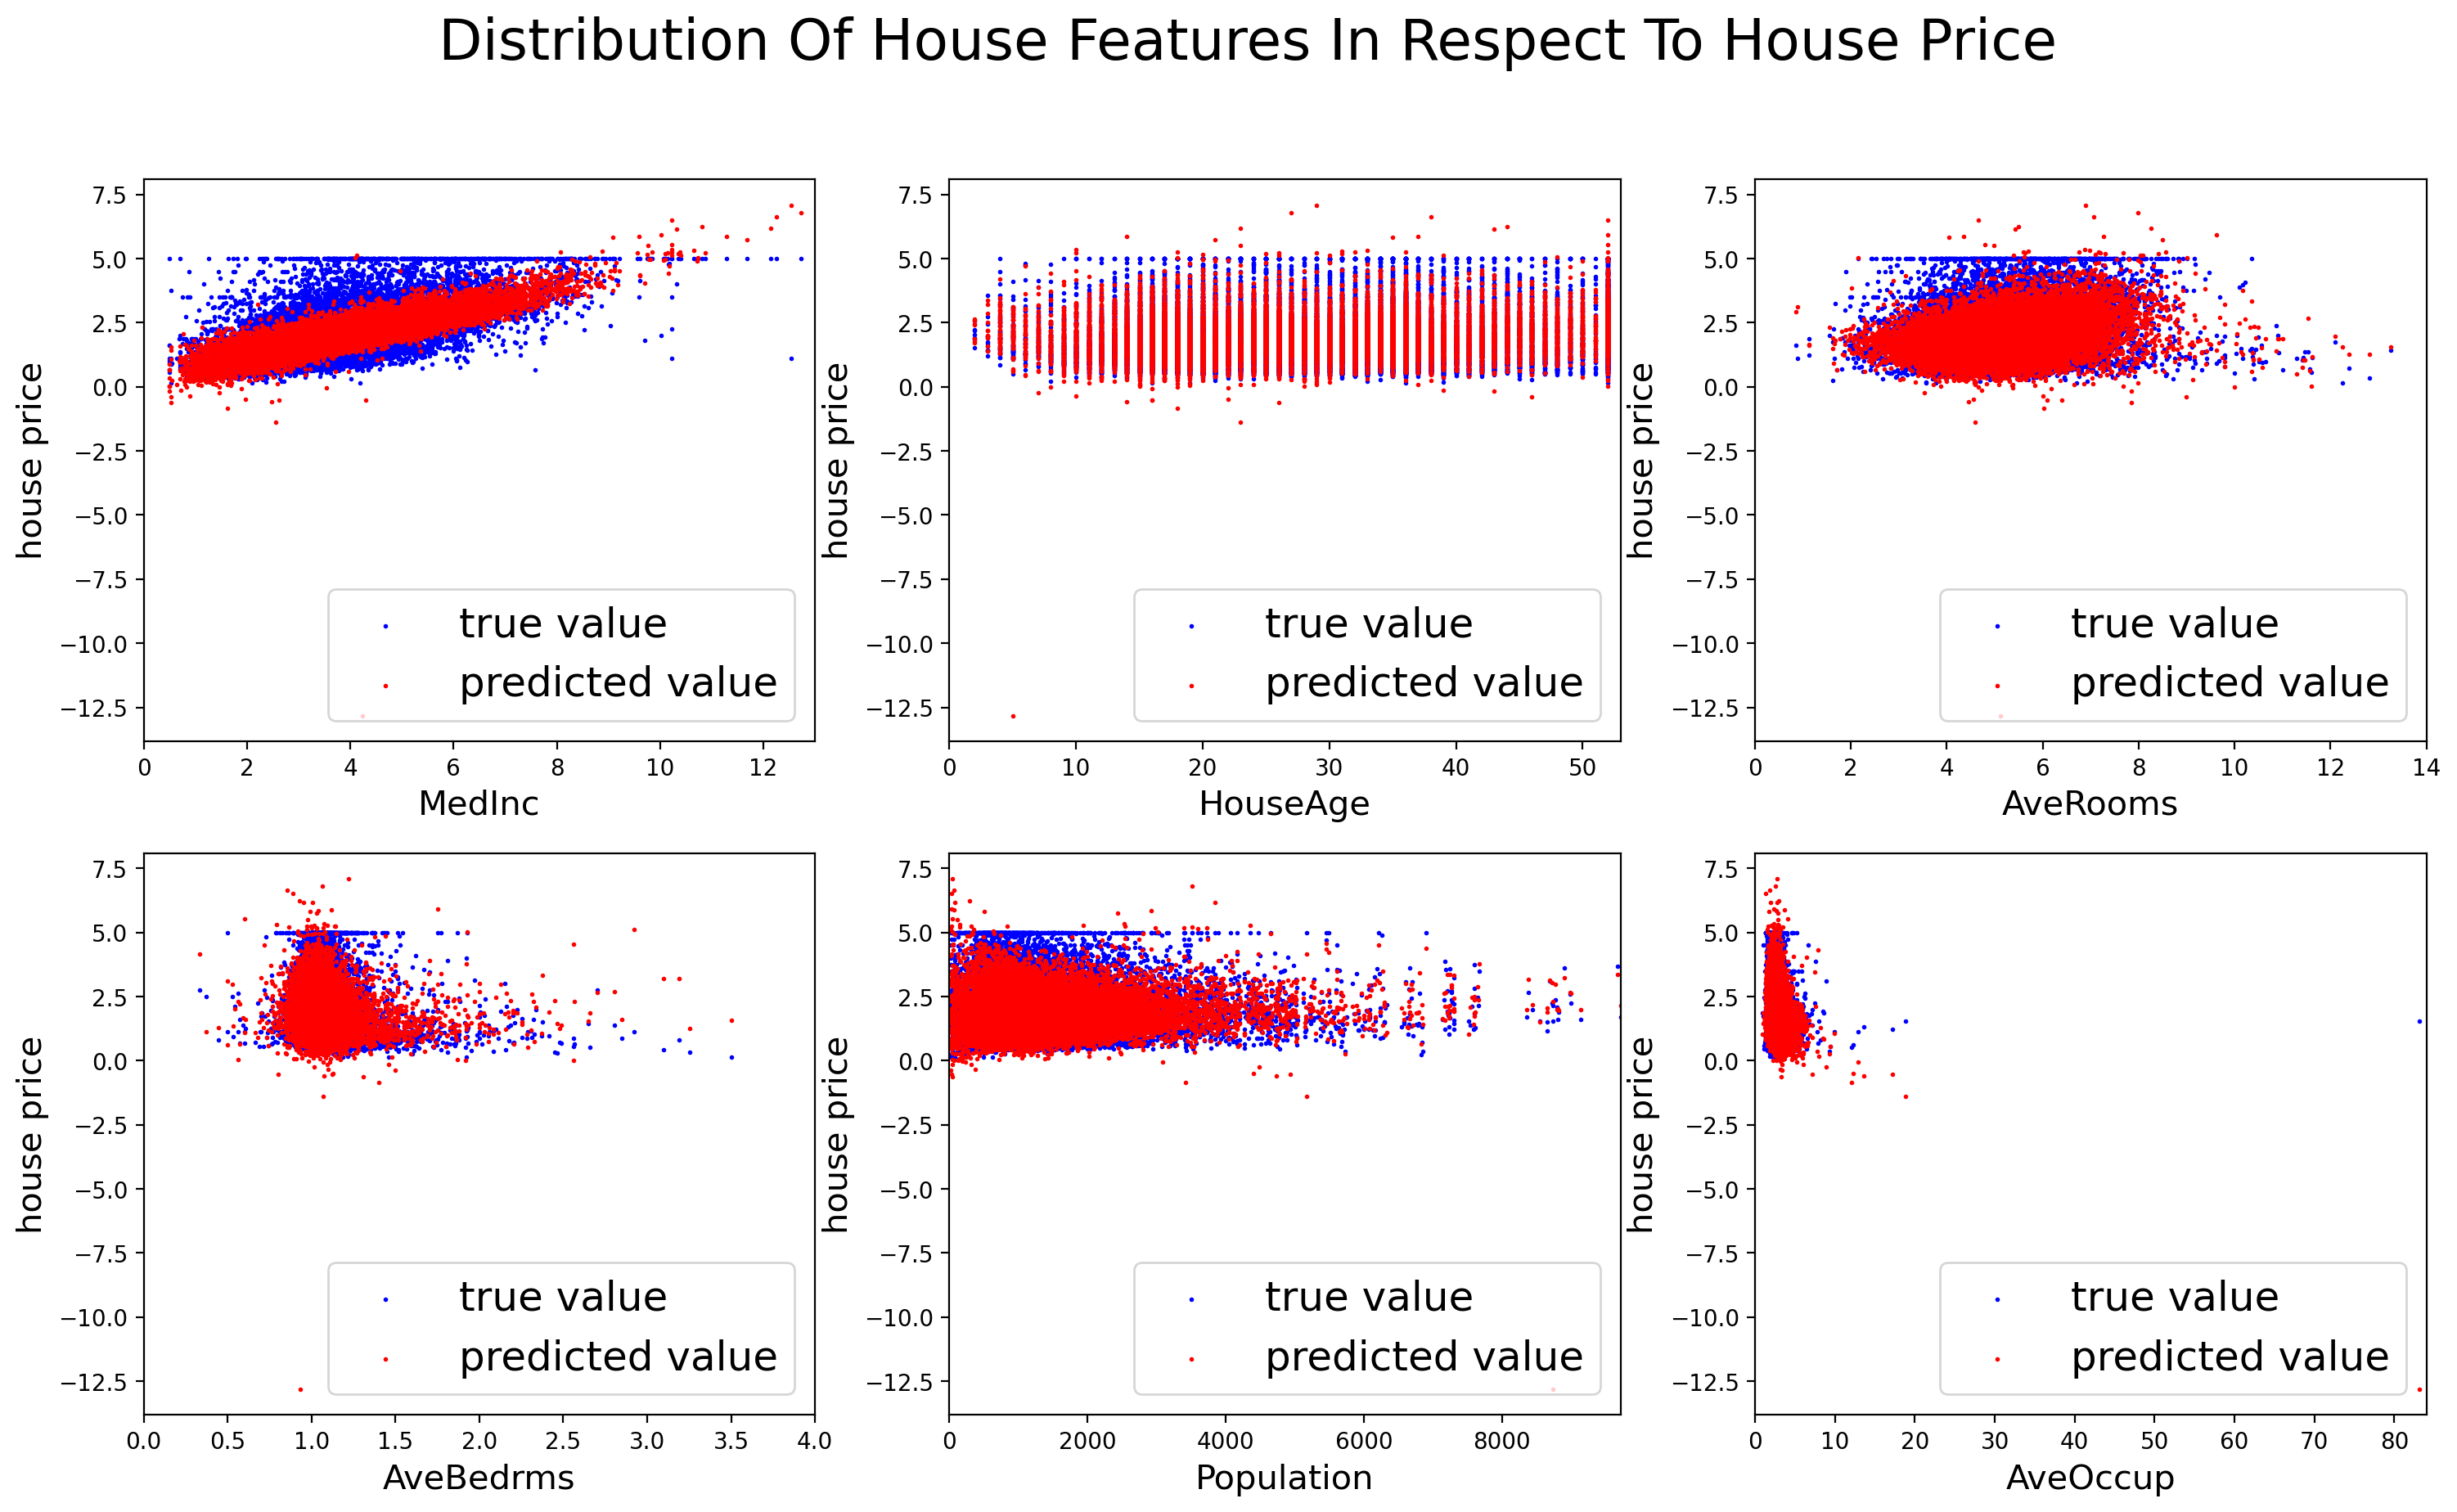

In [18]:
# ------draw scatters to show the true values and predicted values------
features = X.columns.values.tolist()
plt.figure(figsize=(18, 10), dpi=200)
for no_feature in range(len(features)):
    plt.subplot(2, 3, no_feature+1)
    plt.suptitle('Distribution Of House Features In Respect To House Price', fontsize=25)
    plt.scatter(X[features[no_feature]], Y['house_price'], label='true value', s=1, color='blue')
    plt.scatter(X[features[no_feature]], y_pred, label='predicted value', s=1, color = 'red')   # int的强制转换是向下兼容，例如无论是6点几，都会变成6
    plt.xlabel(features[no_feature], fontsize=15)
    plt.ylabel('house price', fontsize=15)
    plt.xlim(0, int(max(X[features[no_feature]]))+1)
    plt.legend(loc="lower right", fontsize=18)
plt.show()

## Task 3: Distribution of house blocks

### Figure 4: scatter plot

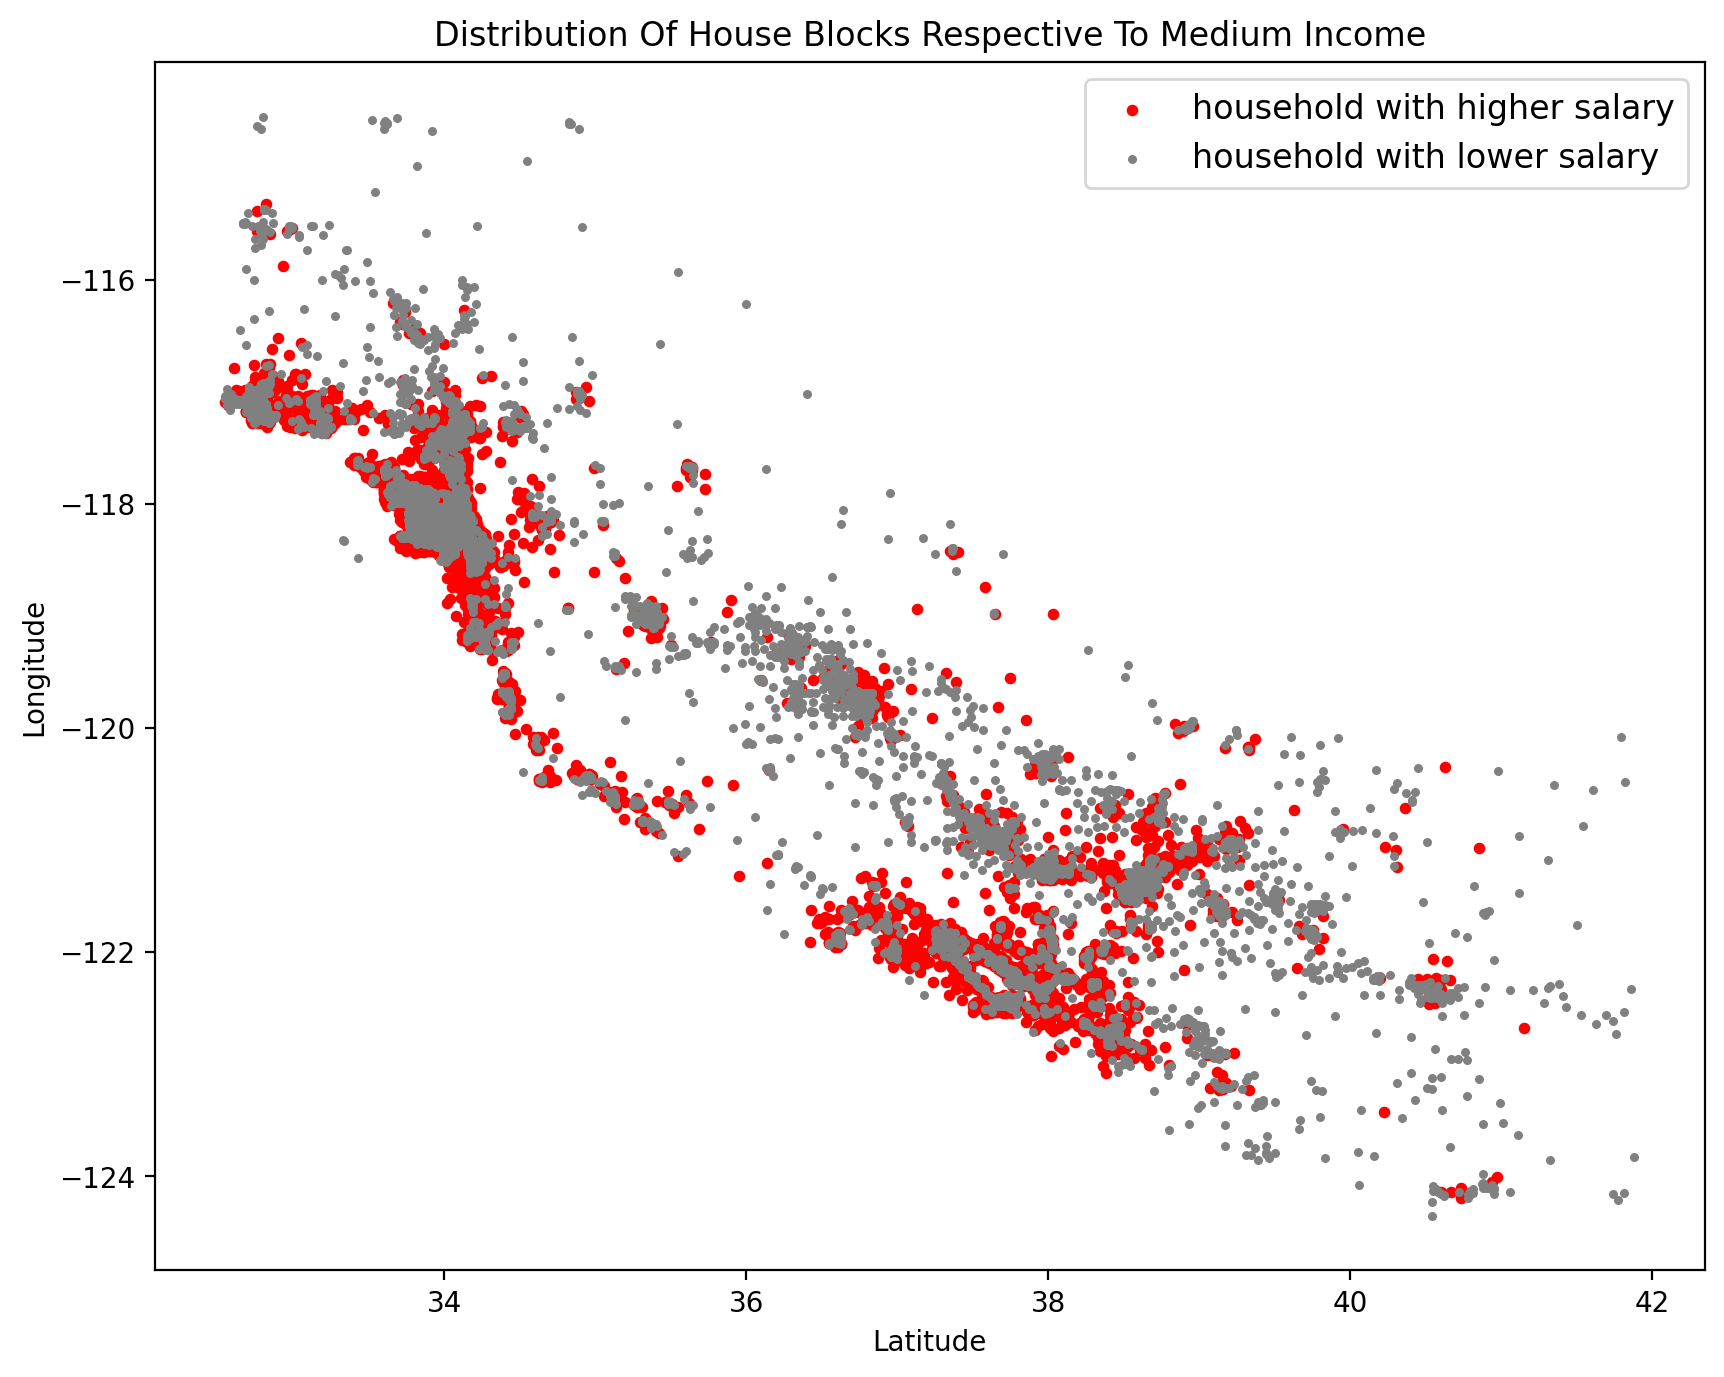

In [19]:
# ======Q3：show the distribution of house blocks(group by household with higher/lower salary)======
# ------split the data by considering the level of salary------
median_MedInc = data['MedInc'].median()   # Set the median as the standard for judging salary
higher_salary = data[data['MedInc']>=median_MedInc]   
lower_salary = data[data['MedInc']<median_MedInc]

# ------draw the scatter plot------
plt.figure(figsize=(10, 8), dpi=200)
plt.title("Distribution Of House Blocks Respective To Medium Income")
plt.scatter(x=higher_salary['Latitude'], y=higher_salary['Longitude'], label='household with higher salary', s=10, color ='red')
plt.scatter(x=lower_salary['Latitude'], y=lower_salary['Longitude'], label='household with lower salary', s=5, color ='grey')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc="best", fontsize=12)
plt.show()

This map depicts the distribution of house blocks in California. It is evident that, people with high income reside in close proximity than the people with lower income.

# 3: Inferences

Nell’s Lettings analysed the California dataset to find out that residents in California preferred houses with an average of 5 rooms and houses with an average house age between 14 and 36 years. Also, people with an average salary between 1-3 ($100,00) owned the majority of houses in California. To determine how house features can influence house value, a Linear Regression Model was used to get the regression coefficients. Six scatter plots are used for comparing the true values and predicted values with respect to all features. From the heat map, we can infer that the correlation between Medium_income and house prices is still the largest and positively correlated. In addition, the AveBedrms also has a positive correlation with house prices, AveRooms has a negative correlation with house prices, and the rest of the features have no obvious correlation with house prices. In summary, people with higher incomes tend to live in more expensive houses and the more bedrooms there are, the higher the house price is likely to be.